In [3]:
!pip install keras

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import os
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

import matplotlib.pyplot as plt



Using TensorFlow backend.


In [0]:
####  ROAD QUALITY +  VANISHING POINT DATASETS #################

X_train=np.load('datasets/RQ_VP/x_train_RQ_VP.npy')
X_test=np.load('datasets/RQ_VP/x_test_RQ_VP.npy')
Y_train=np.load('datasets/RQ_VP/y_train_RQ_VP.npy')
Y_test=np.load('datasets/RQ_VP/y_test_RQ_VP.npy')


Dataset shape: (221, 128, 128, 3)
221 sample, 128 x 128 x 3  size color image.

Examples:


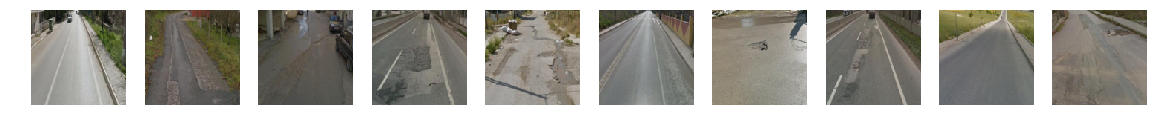

In [6]:
img_size = X_train.shape[1] # 64
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0], 1)].reshape(img_size, img_size, channel_size))
    plt.axis('off')

Dataset shape: (56, 128, 128, 3)
56 sample, 128 x 128 x 3  size color image.

Examples:


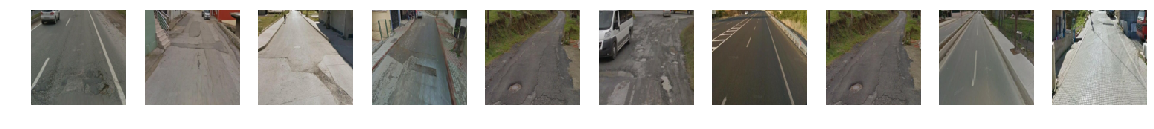

In [7]:
img_size = X_test.shape[1] # 64
channel_size = X_test.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test[np.random.randint(0, X_test.shape[0], 1)].reshape(img_size, img_size, channel_size))
    plt.axis('off')

In [0]:
from Model3_class2 import our_1
model = our_1()

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
__________

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0,vertical_flip=False)

train_generator = datagen.flow(X_train, Y_train, batch_size=64)

foldername="RQ_VP_our_1
filename="/epoch-{epoch:02d}-val-acc-{val_acc:.4f}.hdf5"

checkpoints = []

if not os.path.exists(foldername):
    os.makedirs(foldername)

checkpoints.append(ModelCheckpoint(foldername+filename, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   mode='auto', 
                                   period=1))

checkpoints.append(TensorBoard(log_dir=foldername+'/TensorBoardLogs', 
                               histogram_freq=0, 
                               write_graph=True, 
                               write_images=False, 
                               embeddings_freq=0, 
                               embeddings_layer_names=None, 
                               embeddings_metadata=None))




In [11]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# TRAINING THE MODEL
model.fit_generator(train_generator, 
                    steps_per_epoch=6, 
                    epochs=100, 
                    validation_data=(X_test, Y_test),
                    validation_steps=6,
                    callbacks=checkpoints)


Epoch 1/100
6/6 [==============================] - 1s 180ms/step - loss: 0.7022 - acc: 0.4867 - val_loss: 0.7018 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to Rq_VP_our_1_3/epoch-01-val-acc-0.5000.hdf5
Epoch 2/100
6/6 [==============================] - 1s 106ms/step - loss: 0.7006 - acc: 0.5377 - val_loss: 0.6966 - val_acc: 0.5000

Epoch 00002: val_acc did not improve
Epoch 3/100
6/6 [==============================] - 1s 94ms/step - loss: 0.6929 - acc: 0.5318 - val_loss: 0.6915 - val_acc: 0.5000

Epoch 00003: val_acc did not improve
Epoch 4/100
6/6 [==============================] - 1s 90ms/step - loss: 0.6940 - acc: 0.4838 - val_loss: 0.6784 - val_acc: 0.5536

Epoch 00004: val_acc improved from 0.50000 to 0.55357, saving model to Rq_VP_our_1_3/epoch-04-val-acc-0.5536.hdf5
Epoch 5/100
6/6 [==============================] - 1s 89ms/step - loss: 0.6677 - acc: 0.6236 - val_loss: 0.6305 - val_acc: 0.6964

Epoch 00005: val_acc improved from 0.55357 t

6/6 [==============================] - 1s 93ms/step - loss: 2.0735e-05 - acc: 1.0000 - val_loss: 0.4621 - val_acc: 0.8929

Epoch 00049: val_acc did not improve
Epoch 50/100
6/6 [==============================] - 1s 85ms/step - loss: 1.6075e-05 - acc: 1.0000 - val_loss: 0.4628 - val_acc: 0.8929

Epoch 00050: val_acc did not improve
Epoch 51/100
6/6 [==============================] - 1s 87ms/step - loss: 1.5386e-05 - acc: 1.0000 - val_loss: 0.4633 - val_acc: 0.8929

Epoch 00051: val_acc did not improve
Epoch 52/100
6/6 [==============================] - 1s 94ms/step - loss: 1.6904e-05 - acc: 1.0000 - val_loss: 0.4639 - val_acc: 0.8929

Epoch 00052: val_acc did not improve
Epoch 53/100
6/6 [==============================] - 1s 94ms/step - loss: 1.4486e-05 - acc: 1.0000 - val_loss: 0.4645 - val_acc: 0.8929

Epoch 00053: val_acc did not improve
Epoch 54/100
6/6 [==============================] - 1s 86ms/step - loss: 1.8136e-05 - acc: 1.0000 - val_loss: 0.4653 - val_acc: 0.8929

Epoch 00054:

6/6 [==============================] - 1s 87ms/step - loss: 7.4862e-06 - acc: 1.0000 - val_loss: 0.4837 - val_acc: 0.9107

Epoch 00098: val_acc did not improve
Epoch 99/100
6/6 [==============================] - 1s 89ms/step - loss: 7.2671e-06 - acc: 1.0000 - val_loss: 0.4840 - val_acc: 0.9107

Epoch 00099: val_acc did not improve
Epoch 100/100
6/6 [==============================] - 1s 95ms/step - loss: 6.1230e-06 - acc: 1.0000 - val_loss: 0.4843 - val_acc: 0.9107

Epoch 00100: val_acc did not improve


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
####  ROAD QUALITY and VP RESULT ##################
model.load_weights("RQ_VP_our_1/epoch-25-val-acc-0.9107.hdf5")
x_test = np.load('datasets/RQ_VP/x_test_RQ_VP.npy')
y_test = np.load('datasets/RQ_VP/y_test_RQ_VP.npy')

In [0]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [0]:
testPredict = model.predict(x_test)

In [19]:
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[27  1]
 [ 4 24]]
